In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

In [2]:
def f(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)
    #return x1**4 + x2**4
    #return x1**2 + x2**2 + 5*((x1-1)**2)

In [3]:
def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])
def gradPert(x1, x2, pert):
    return np.array([(f(x1+pert, x2) - f(x1, x2))/pert, (f(x1, x2+pert) - f(x1, x2))/pert])
def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

In [24]:
x1, x2 = 2, 1

t = 0.1
epsilon = pow(10,-6)

pert = 0.1
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2_wp = [[x1, x2]]


while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2_wp = np.vstack((evolution_X1_X2_wp, [x1, x2]))
    #grad_f = gradient(x1, x2)
    grad_f = gradPert(x1, x2, pert)
    n_grad = norm(grad_f)
    i +=1
evolution_X1_wp = evolution_X1_X2_wp[:, 0]
evolution_X2_wp = evolution_X1_X2_wp[:, 1]


x1, x2 = 2, 1

t = 0.1
epsilon = pow(10,-6)

grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2_bp = [[x1, x2]]


while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2_bp = np.vstack((evolution_X1_X2_bp, [x1, x2]))
    #grad_f = gradient(x1, x2)
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1
evolution_X1_bp = evolution_X1_X2_bp[:, 0]
evolution_X2_bp = evolution_X1_X2_bp[:, 1]

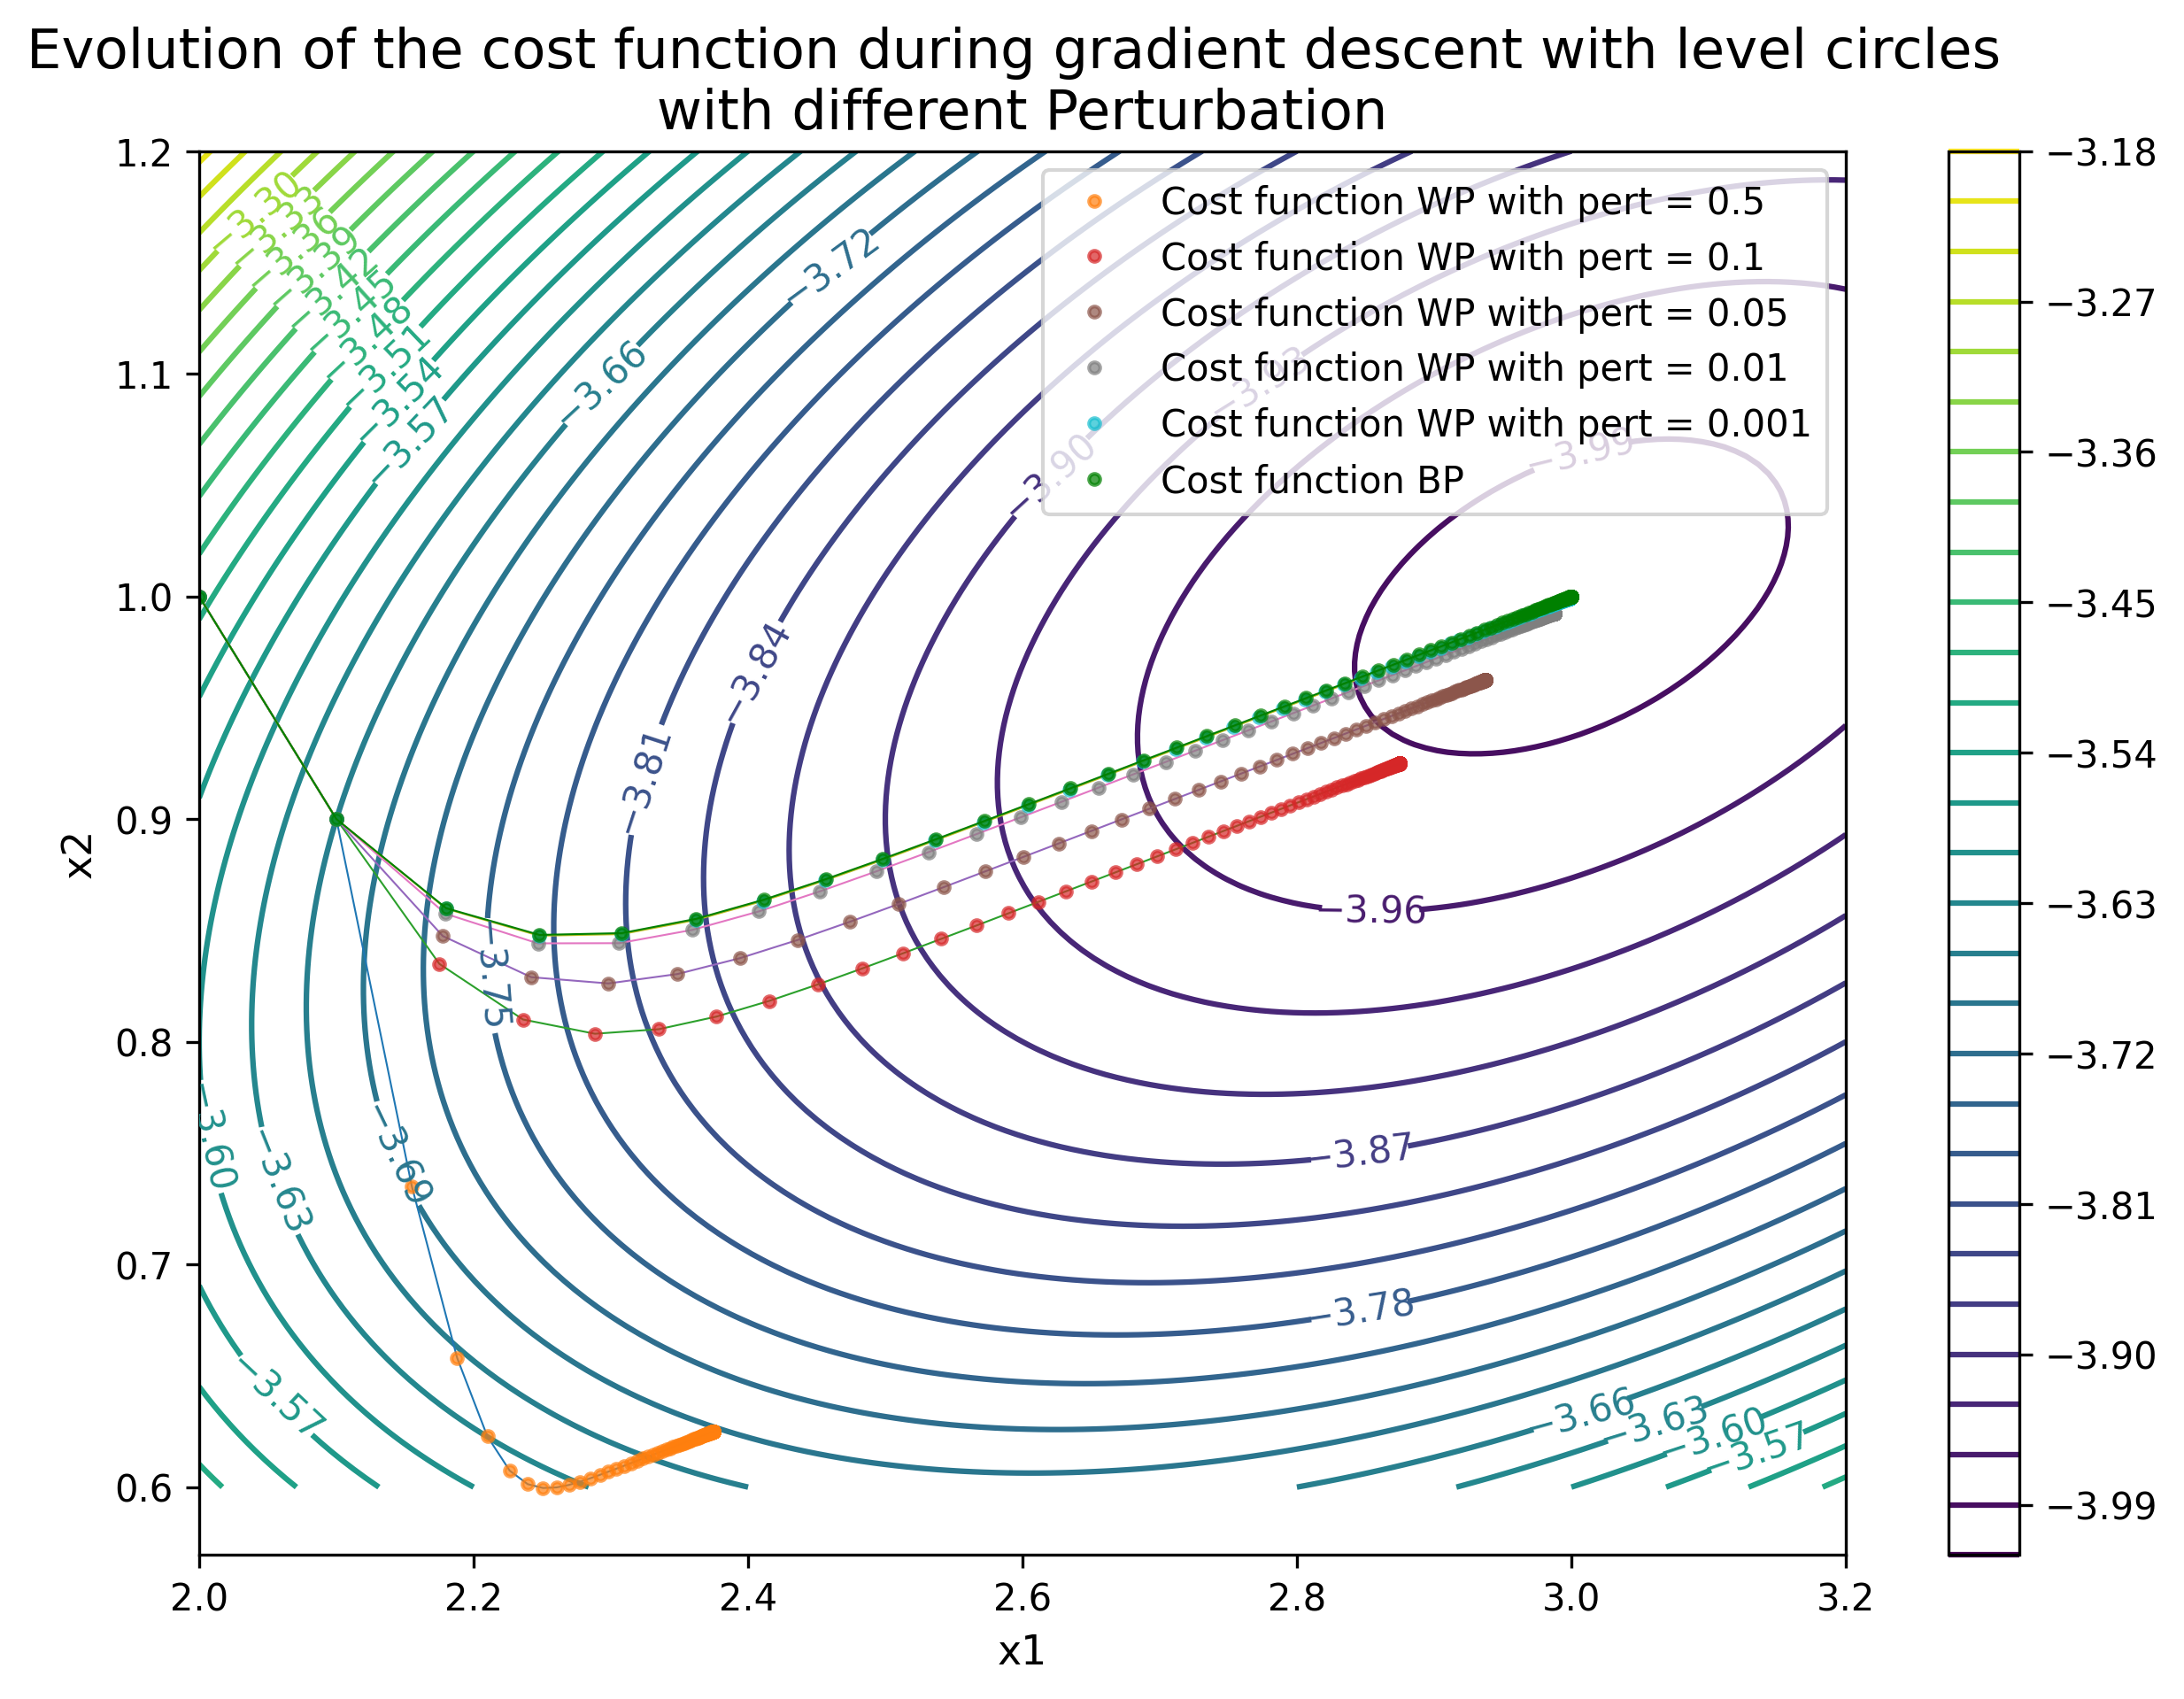

In [31]:
x1 = np.linspace(2, 3.2, 150)
x2 = np.linspace(0.6, 1.2, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,7))
plt.gcf().set_dpi(300)
contours = plt.contour(X1, X2, Z, 30)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title(f"Evolution of the cost function during gradient descent with level circles \n with different Perturbation ", fontsize=15)
for pert in [0.5, 0.1, 0.05, 0.01, 0.001]:
    x1, x2 = 2, 1

    t = 0.1
    epsilon = pow(10,-6)

    #pert = 0.1
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i = 1
    evolution_X1_X2_wp = [[x1, x2]]


    while n_grad > epsilon:
        
        direction = -grad_f
        x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
        evolution_X1_X2_wp = np.vstack((evolution_X1_X2_wp, [x1, x2]))
        #grad_f = gradient(x1, x2)
        grad_f = gradPert(x1, x2, pert)
        n_grad = norm(grad_f)
        i +=1
    evolution_X1_wp = evolution_X1_X2_wp[:, 0]
    evolution_X2_wp = evolution_X1_X2_wp[:, 1]
    plt.plot(evolution_X1_wp, evolution_X2_wp, linewidth = 0.5)
    plt.plot(evolution_X1_wp, evolution_X2_wp, '.', alpha = 0.7, label = f"Cost function WP with pert = {pert}")
plt.plot(evolution_X1_bp, evolution_X2_bp, 'g', linewidth = 0.5)
plt.plot(evolution_X1_bp, evolution_X2_bp, 'g.', alpha = 0.7, label = "Cost function BP")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

https://medium.com/analytics-vidhya/visualize-the-gradient-descent-of-a-cost-function-with-its-level-circles-python-d8c850731b0a

In [27]:
x1, x2 = 2, 1

t = 0.1
epsilon = pow(10,-6)

grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2 = [[x1, x2]]


while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    #grad_f = gradPert(x1, x2, 0.1)
    n_grad = norm(grad_f)
    i +=1

In [28]:
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

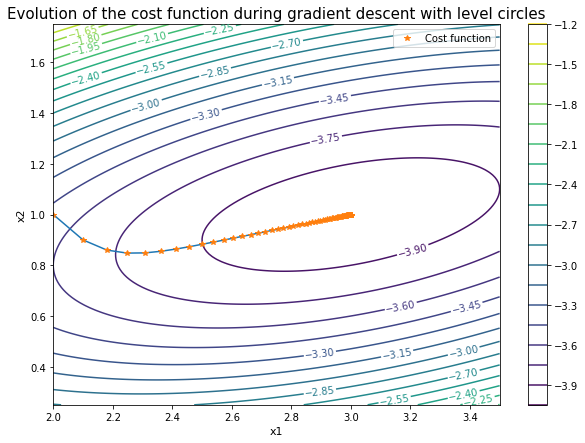

In [29]:
x1 = np.linspace(2, 3.5, 150)
x2 = np.linspace(0.25, 1.75, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

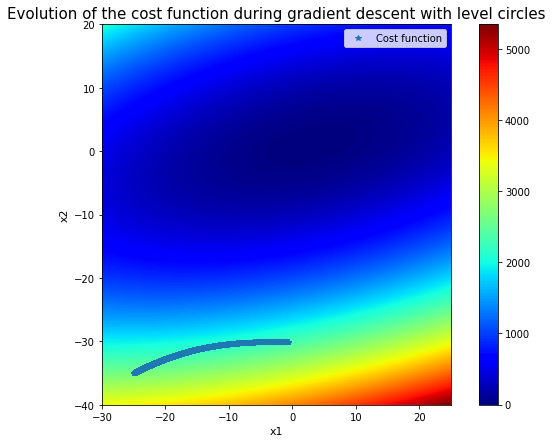

In [108]:
x1, x2 = -25, -35
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
t = 0.1
epsilon = pow(10,-6)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2_wp = [[x1, x2]]
while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2_wp = np.vstack((evolution_X1_X2_wp, [x1, x2]))
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1
evolution_X1_wp = evolution_X1_X2_wp[:, 0]
evolution_X2_wp = evolution_X1_X2_wp[:, 1]


x1 = np.linspace(-30, 25, 150)
x2 = np.linspace(-40, 20, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,7))
plt.imshow(Z, extent = [-30,25,-40,20], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1_wp, evolution_X2_wp, 'y')
plt.plot(evolution_X1_wp, evolution_X2_wp, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

In [112]:
x1_copy, x2_copy = -25, -35
k = 1000000000
x1, x2 = x1_copy, x2_copy
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
t = 0.0000001
epsilon = pow(10,-6)
n_grad = norm(grad_f)
i = 1
iter = 0
evolution_X1_X2_wp = [[x1, x2]]
while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2_wp = np.vstack((evolution_X1_X2_wp, [x1, x2]))
    grad_f = gradPert(x1, x2, 10)
    n_grad = norm(grad_f)
    i +=1
    iter +=1
evolution_X1_wp = evolution_X1_X2_wp[:, 0]
evolution_X2_wp = evolution_X1_X2_wp[:, 1]

KeyboardInterrupt: 

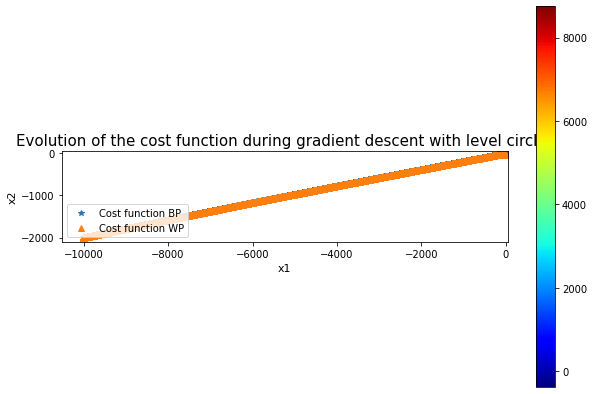

In [ ]:
x1, x2 = x1_copy, x2_copy
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
t = 0.0000001
epsilon = pow(10,-6)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2_bp = [[x1, x2]]
iter = 1
while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2_bp = np.vstack((evolution_X1_X2_bp, [x1, x2]))
    grad_f = gradient(x1 , x2)
    n_grad = norm(grad_f)
    i +=1
    iter+=1
evolution_X1_bp = evolution_X1_X2_bp[:, 0]
evolution_X2_bp = evolution_X1_X2_bp[:, 1]


x1 = np.linspace(-50, 50, 150)
x2 = np.linspace(-50, 50, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,7))
plt.imshow(Z, extent = [-50, 50,-50, 50], origin = 'lower', cmap = 'jet', alpha = 1)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1_bp, evolution_X2_bp, 'y')
plt.plot(evolution_X1_bp, evolution_X2_bp, '*', label = "Cost function BP")


plt.plot(evolution_X1_wp, evolution_X2_wp, 'r')
plt.plot(evolution_X1_wp, evolution_X2_wp, '^', label = "Cost function WP")


plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "lower left")
plt.show()